<a href="https://colab.research.google.com/github/Cheruugit/EDA_PracticeProjects/blob/main/Factors_influencing_Churn_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Telco Company
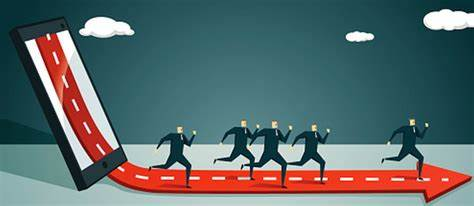

This is Telco company that provides services to customers. Some customers have left and we want to understand /analyze the case and reasons for leaving from the features provided in the data.

#About Dataset
**-Customers who left within the last month – the column is called Churn**

-**Services that each customer has signed up for **– phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

-**Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

-**Demographic info about customers** – gender, age range, and if they have partners and dependents

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Explore data

In [4]:
df.shape

(7043, 21)

In [5]:
#missing values
missing= df.isnull().sum()
missing

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['SeniorCitizen'].unique()

array([0, 1])

In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df['SeniorCitizen']=df['SeniorCitizen'].replace(0, 'No')
df['SeniorCitizen']=df['SeniorCitizen'].replace(1, 'Yes')


In [12]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# Check for non-numeric values in the 'TotalCharges' column
non_numeric_values = df['TotalCharges'][pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

# Print the non-numeric values
print("Non-numeric values in 'TotalCharges':")
print(non_numeric_values)

# Remove non-numeric values and convert the column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verify the changes
df['TotalCharges'] = df['TotalCharges'].astype(float)


Non-numeric values in 'TotalCharges':
488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [14]:
df['TotalCharges'].isnull().sum()

11

missing values are so small compared to the ratio of data size and were lost completely at random hence dropping will not affect the analysis

In [15]:
df.dropna(subset ='TotalCharges', inplace =True)

In [16]:
df['TotalCharges'].isnull().sum()

0

In [17]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

explore outliers in total charges

<Axes: xlabel='TotalCharges', ylabel='Count'>

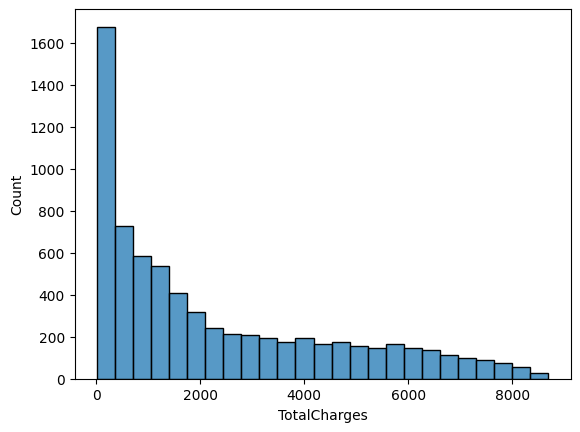

In [18]:
sns.histplot(df['TotalCharges'])

#Insight
From the graph we can see that our customer base is in the first segmentation  and it decreases as the income rises. it follows a  skewed distribution

{'whiskers': [<matplotlib.lines.Line2D at 0x7c3fd55cea40>,
 'caps': [<matplotlib.lines.Line2D at 0x7c3fd55cef80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c3fd55ce7a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c3fd55cf4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c3fd55cf760>],
 'means': []}

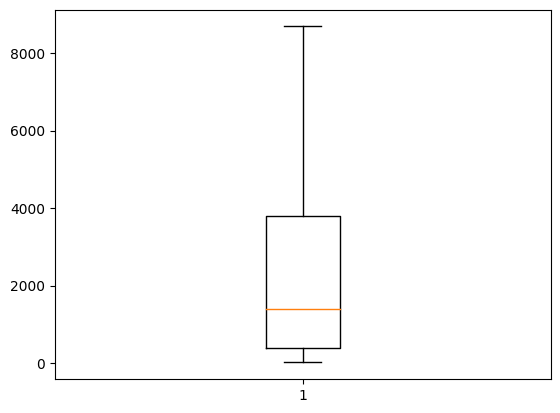

In [19]:
plt.boxplot(df['TotalCharges'])

<Axes: ylabel='TotalCharges'>

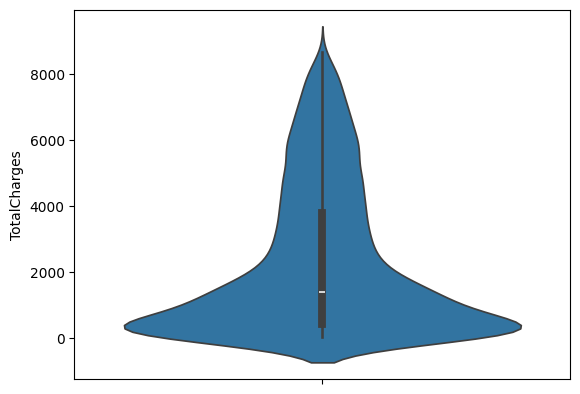

In [20]:
sns.violinplot(df['TotalCharges'])

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

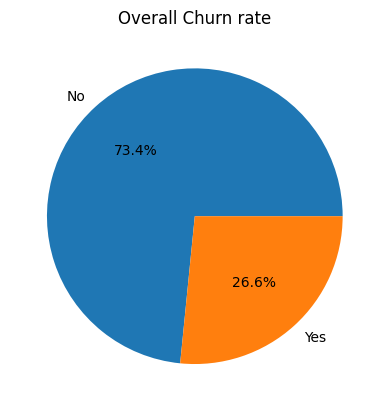

In [22]:
#overall churn rate in company?
churn_rate= df['Churn'].value_counts()
plt.pie(churn_rate.values, labels=churn_rate.index, autopct= '%1.1f%%')
plt.title('Overall Churn rate')
plt.show()

#Insight
About 26.6% of the customer base left in the last month.

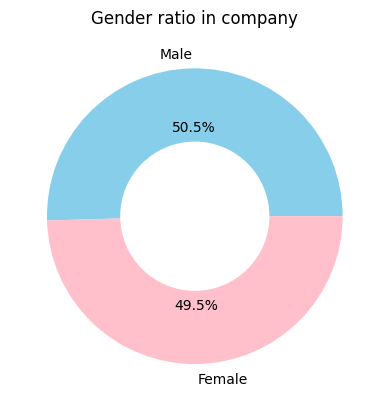

In [23]:
#gender ratio in company
gender_rate= df['gender'].value_counts()
plt.pie(gender_rate.values, labels=gender_rate.index,colors=['skyblue', 'pink'], autopct= '%1.1f%%')


my_circle=plt.Circle((0,0),0.50, color ='White')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Gender ratio in company')
plt.show()

#Gender difference in churn rate

Text(0.5, 1.0, 'Gender vs Churn')

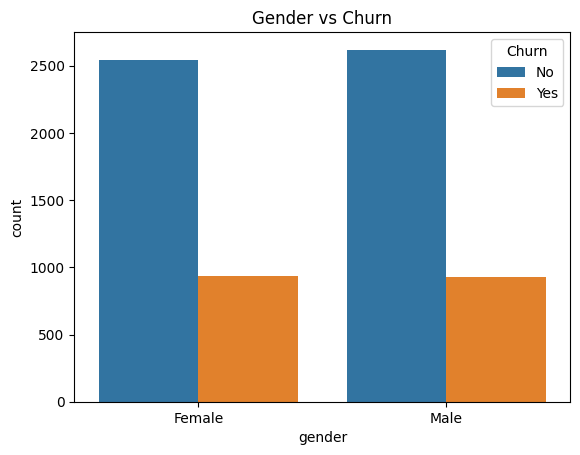

In [24]:
sns.countplot( x='gender', hue ='Churn', data =df)
plt.title('Gender vs Churn')


#Insight
there is no significance relationship between gender and churn rate

### Does being a senior citizen affect the likelihood of churning?

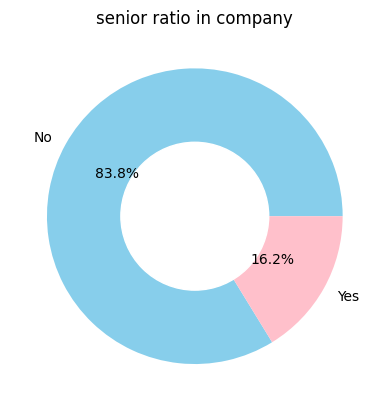

In [25]:
#checking the ratio of senior citizens in company
senior_rate= df['SeniorCitizen'].value_counts()
plt.pie(senior_rate.values, labels=senior_rate.index,colors=['skyblue', 'pink'], autopct= '%1.1f%%')


my_circle=plt.Circle((0,0),0.50, color ='White')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('senior ratio in company')
plt.show()

16.2% of the population comprises senior citizens.

Text(0.5, 1.0, 'SeniorCitizen vs Churn')

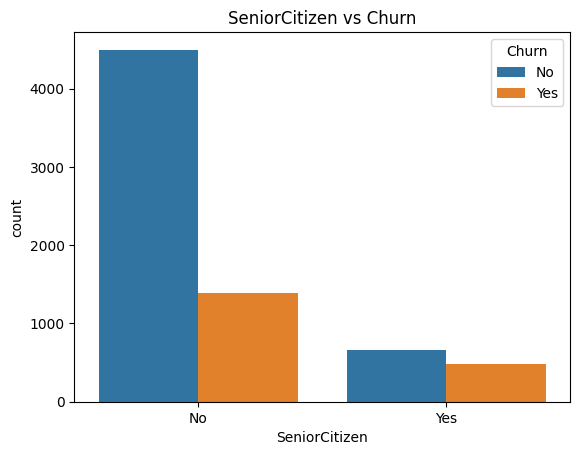

In [26]:
sns.countplot( x='SeniorCitizen', hue ='Churn', data =df)
plt.title('SeniorCitizen vs Churn')

 senior citizens are more likely to churn compared to non-senior citizens.

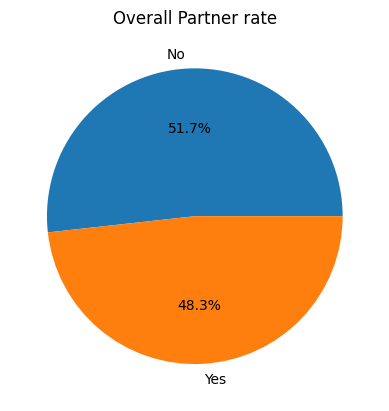

In [46]:
partner_rate= df['Partner'].value_counts()
plt.pie(partner_rate.values, labels=partner_rate.index, autopct= '%1.1f%%')
plt.title('Overall Partner rate')
plt.show()

A significant portion, 51.7%, of customers are without partners.

### are customers with partners likely to churn?

Text(0.5, 1.0, 'Churn rate for Customers With/without partners')

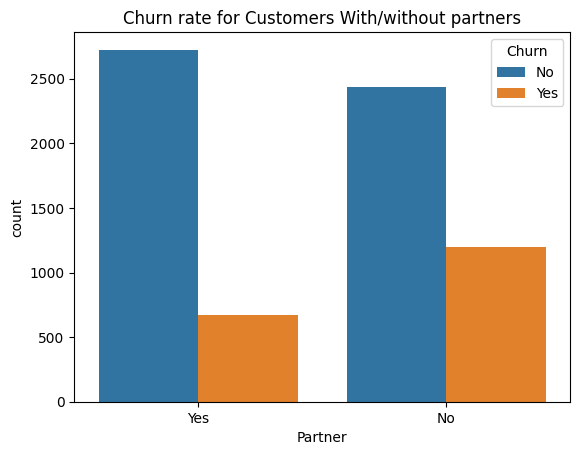

In [29]:
sns.countplot(df, x='Partner', hue='Churn')
plt.title('Churn rate for Customers With/without partners')
#plt.xlabel()

customers without partners are more likely to churn compared to those with partners

### Does having dependents affect churn rate?

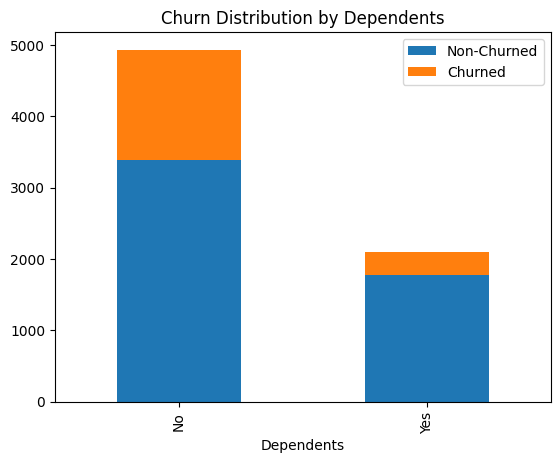

In [30]:
#df.groupby(["Dependents", "Churn"]).size() operation counts the occurrences of 'Yes' and 'No' churn for each contract type.
#The .unstack() operation rearranges the data to create a DataFrame where each row corresponds to a contract type,
#and columns represent the counts of 'Yes' and 'No' churn.
df_grouped= df.groupby(["Dependents", "Churn"]).size().unstack()
df_grouped.plot(kind ='bar', stacked=True)
plt.title("Churn Distribution by Dependents")
plt.xlabel("Dependents")
plt.legend(['Non-Churned', 'Churned'])

It's interesting to note that customers with no dependents have a higher likelihood to churn.

In [31]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [32]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [33]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

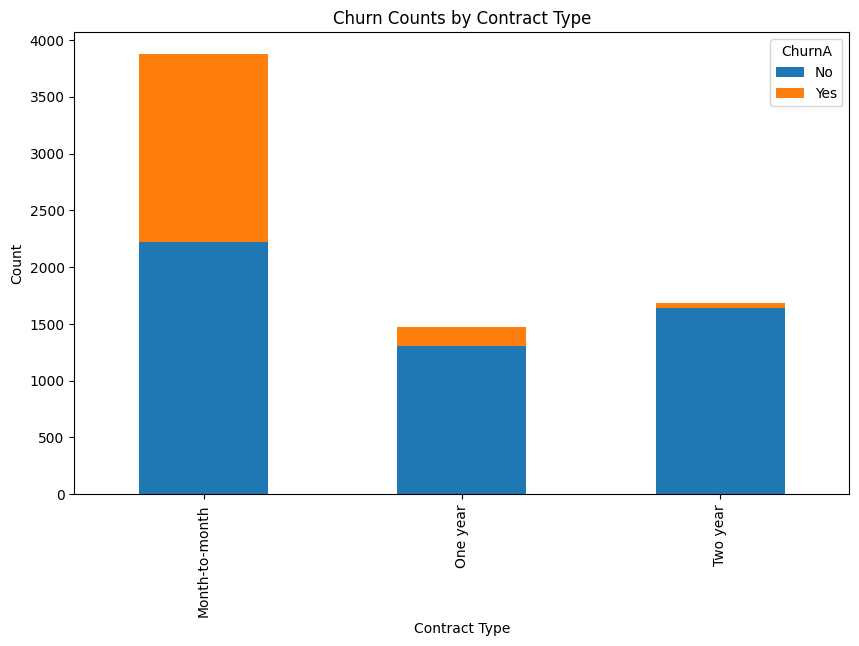

In [34]:

# Map 'No' to 0 and 'Yes' to 1 in the 'Churn' column
df['ChurnA'] = df['Churn'].replace({'No': 0, 'Yes': 1})

# Create a DataFrame with counts of 'Yes' and 'No' churn for each contract type
contract_churn_counts = df.groupby(['Contract', 'ChurnA']).size().unstack()

# Plot a stacked bar chart
contract_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Counts by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='ChurnA', loc='upper right', labels=['No', 'Yes'])
plt.show()


It seems like customers on a month-to-month basis are more likely to churn compared to those on longer-term contracts, such as one year or two years. This pattern suggests that Telco should encourage customers to commit to longer contract durations to reduce churn rates.

In [35]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

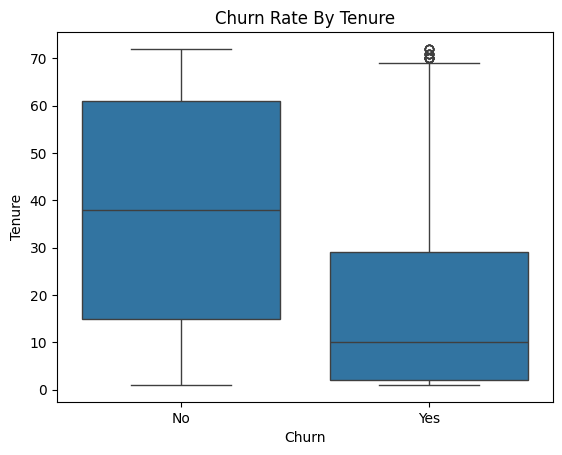

In [36]:
sns.boxplot(x='Churn', y='tenure', data =df)
plt.title('Churn Rate By Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

The observation that customers who have churned tend to have a shorter tenure period compared to those who haven't churned is significant.The median tenure periods implies that customers with shorter tenure are more prone to churn, while those with longer tenure are more likely to remain loyal to the company.

### How  many customers have phone service?

Text(0.5, 1.0, 'Phone Service rate in Customers')

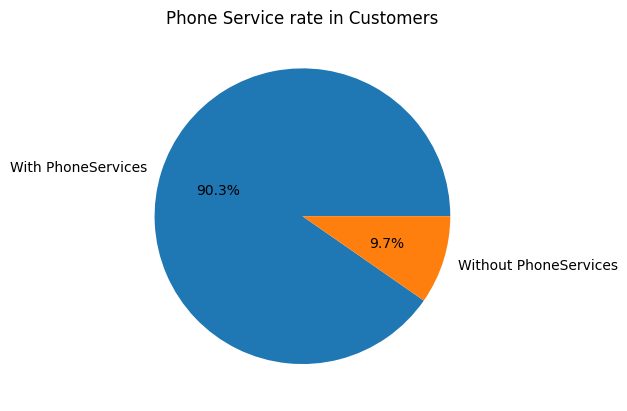

In [37]:
counts=df['PhoneService'].value_counts()
labels= ["With PhoneServices", "Without PhoneServices"]
plt.pie(counts.values,labels=labels, autopct= '%1.1f%%')
plt.title('Phone Service rate in Customers')

###Does presence or absence affect of phone service impact churn behaviour?

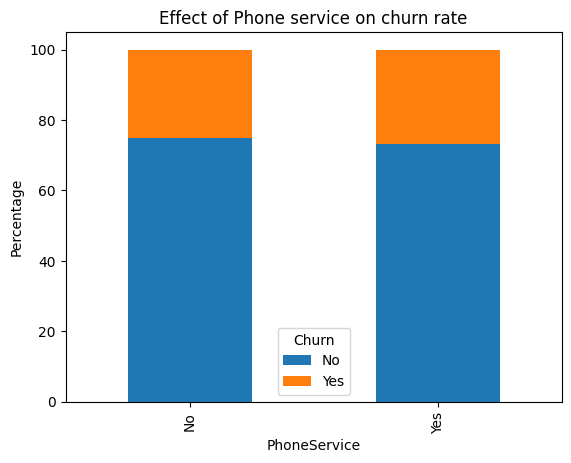

In [49]:
# Calculate counts percentage
bygroup_percentage = bygroup.div(bygroup.sum(axis=1), axis=0) * 100

# Plot
bygroup_percentage.plot(kind='bar', stacked=True)
plt.title('Effect of Phone service on churn rate')
plt.ylabel('Percentage')
plt.xlabel('PhoneService')
plt.show()


The percentage rate of churn is almost the same for customers with and without phone service, it suggests that phone service might not be a significant factor influencing churn in this dataset.

### Effect of multiple lines on churn?

In [40]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

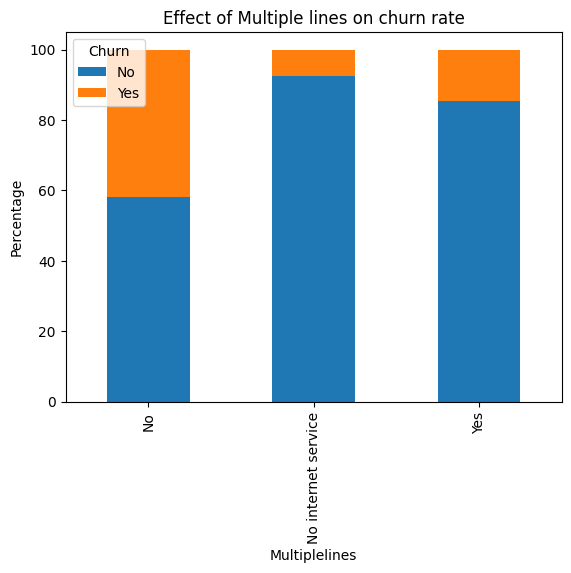

In [51]:
# Calculate counts percentage
by_group_percentage = by_group.div(by_group.sum(axis=1), axis=0) * 100

# Plot
by_group_percentage.plot(kind='bar', stacked=True)
plt.title('Effect of Multiple lines on churn rate')
plt.ylabel('Percentage')
plt.xlabel('Multiplelines')
plt.show()


Which Internet service provider has the highest churn rate?

In [42]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Text(0.5, 1.0, 'InternetService vs ChurnA')

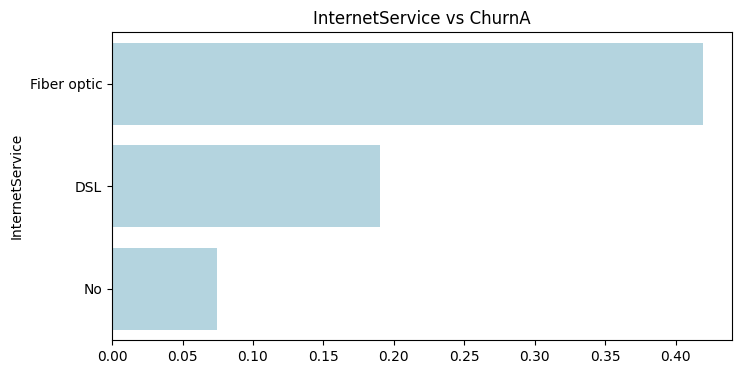

In [43]:
df['ChurnA'] = df['Churn'].map({'No': 0, 'Yes': 1})
internet_group=df.groupby('InternetService')['ChurnA'].mean().reset_index()
internet_group=internet_group.sort_values('ChurnA', ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x='ChurnA', y='InternetService', data=internet_group, color='lightblue')
plt.xlabel('')
plt.title('InternetService vs ChurnA')

###Do customers with online security tend to churn less frequently

In [44]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Text(0.5, 0, 'OnlineSecurity')

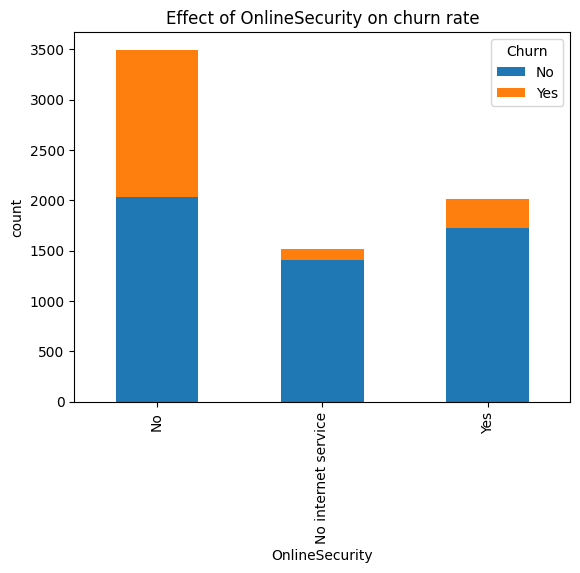

In [45]:
by_group= df.groupby(['OnlineSecurity','Churn']).size().unstack()
by_group.plot(kind='bar', stacked =True)
plt.title('Effect of OnlineSecurity on churn rate')
plt.ylabel('count')
plt.xlabel('OnlineSecurity')
#plt.legend()

Larger ratio of customers dont have online security and it appears that they tend to churn more than those who have online security

# Conclusion

### Features that have an influence on the churn rate:

SeniorCitizen: yes

Partner: no

Dependents: no

Tenure: low tenure

InternetService: fiber optic

OnlineSecurity: no



### Features that don't have an influence on the churn rate:

Gender

PhoneService

MultipleLines